# Introduction to Data Science - Homework 6
*CS 5963 / MATH 3900, University of Utah, http://datasciencecourse.net/*

Due: Friday, November 11, 11:59pm.

In this homework, you will (i) analyze US Crime data using clustering and principal component analysis and (ii) investigate the Karate Club dataset using network analysis. 

## Your Data
Fill out the following information: 

**First Name:** *Tyler*
**Last Name:** *Clive*
**E-mail:** *u0389772@utah.edu*
**UID:**  *u0389772*

## Part 1: Analyze US Crime data

We'll analyze a dataset describing 1973 violent crime rates by US State. The crimes considered are assault, murder, and rape. Also included is the percent of the population living in urban areas.

The dataset is available as [USarrests.csv](USarrests.csv). The dataset has 50 observations (corresponding to each state) on 4 variables: 
1. Murder: Murder arrests (per 100,000 residents)
2. Assault: Assault arrests (per 100,000 residents)
3. UrbanPop: Percent urban population
4. Rape: Rape arrests (per 100,000 residents)


You can read more about the dataset [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html). 

Our goal will be to use PCA and clustering tools to understand how violent crimes differ between states. 


### Task 1.1 Import the data and perform some prelimary exploratory analysis. 
Use the *read_csv* function to import the data as a pandas dataframe. 

Plot a scatterplot matrix of the data. Explore basic statistics of the data. Write a few sentences describing how the variables are correlated. 

In [336]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from matplotlib.colors import ListedColormap

pd.set_option('display.notebook_repr_html', False)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

            Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000


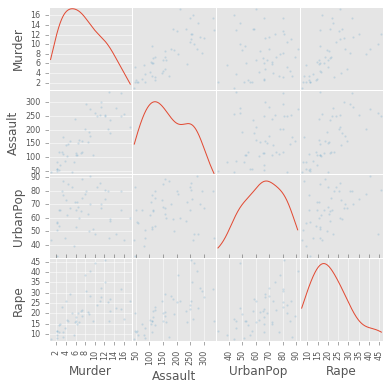

In [360]:
from pandas.tools.plotting import scatter_matrix

US_arrests_df = pd.read_csv('USarrests.csv')
scatter_matrix(US_arrests_df, alpha=0.2, figsize=(6, 6), diagonal='kde')

#print(US_arrests_df)

US_arrests_df.describe(percentiles=None, include=None, exclude=None)

print(US_arrests_df.corr(method='pearson', min_periods=1))
#plt.matshow(US_arrests_df.corr())

**Your description:** 

Murder and assault have the highest correlation - coeff. = 80% (not surprisingly because assaults often escalate to murder) - although rape is also highly correlated with assault - coeff. = 67%. Population denisty is more correlated with rape (coeff. = 41%) than any other crime.

### Task 1.2 Principal Component Analysis (PCA) 

In this task, you'll perform a principal component analysis of the dataset. A principal component analysis of this dataset using R is performed in Chapter 10 of An Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. A digital copy of this book is available [here](http://www-bcf.usc.edu/~gareth/ISL/). In this exercise, you'll largely repeat the analysis in this chapter, of course using python. You're strongly encouraged to read this chapter for a better understanding and interpretation of the method. 

1. Scale the dataset using the *scale* function of the sklearn.preprocessing library. 
+ Calculate the principal components of the dataset. 
+  Store the principal components in a new dataframe that looks like this: 
![](pcas.png)
+ Plot a scatterplot of PC1 and PC2. Use the state names as markers (instead of dots). Hint: use the matplotlib function *annotate*. 
+ Print the explained variance ratio of the PCA. Plot the explained variace ratio of the PCA. Interpret these values. Is it reasonable to reduce the four dimensional space to two dimensions using PCA? 

In [361]:
# scale the dataset

#US_arrests_df['Unnamed: 0']
US_arrests_df.set_index('Unnamed: 0', drop = True, inplace=True)

scaled_data = scale(US_arrests_df, axis=0, with_mean=True, with_std=True, copy=True)

# find PCA and transform to new coordinates

pca = PCA()
PCA_x_coordinates = pca.fit_transform(X)

# create a new pandas dataframe 

index_list = US_arrests_df.index.tolist()
column_list = ['PCA1','PCA2','PCA3','PCA4']

new_df = pd.DataFrame(data=scaled_data,    # values
                    index=index_list,    # 1st column as index
                    columns=column_list)  # 1st row as the column names


print(new_df)
print()
print(new_df.describe())
#print()
#print(index_list)

                    PCA1      PCA2      PCA3      PCA4
Alabama         1.255179  0.790787 -0.526195 -0.003451
Alaska          0.513019  1.118060 -1.224067  2.509424
Arizona         0.072361  1.493817  1.009122  1.053466
Arkansas        0.234708  0.233212 -1.084492 -0.186794
California      0.281093  1.275635  1.776781  2.088814
Colorado        0.025976  0.402909  0.869548  1.883901
Connecticut    -1.040880 -0.736484  0.799761 -1.092723
Delaware       -0.437875  0.815030  0.450825 -0.585834
Florida         1.765415  1.990786  1.009122  1.150530
Georgia         2.229265  0.487757 -0.386621  0.492653
Hawaii         -0.577030 -1.512241  1.218484 -0.111300
Idaho          -1.203228 -0.615272 -0.805344 -0.758392
Illinois        0.605789  0.948363  1.218484  0.298525
Indiana        -0.136372 -0.700121 -0.037685 -0.025021
Iowa           -1.295998 -1.391029 -0.595982 -1.071153
Kansas         -0.414682 -0.675878  0.032102 -0.348567
Kentucky        0.443441 -0.748605 -0.944918 -0.531910
Louisiana 

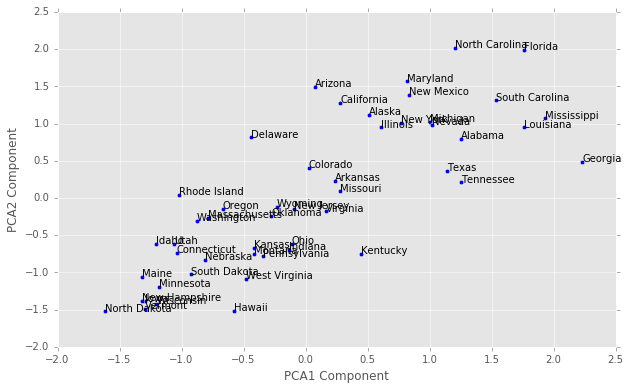

In [339]:
# Plot Principal Components 1 and 2

xPlot = new_df['PCA1']
yPlot = new_df['PCA2']
label = index_list

fig, ax = plt.subplots()
ax.scatter(xPlot,yPlot)

plt.xlabel('PCA1 Component')
plt.ylabel('PCA2 Component')

for state, txt in enumerate(label):
    ax.annotate(txt, (xPlot[state],yPlot[state]))

[0.62006039478737351, 0.24744128813496027, 0.089140795145207383, 0.043357521932458794]


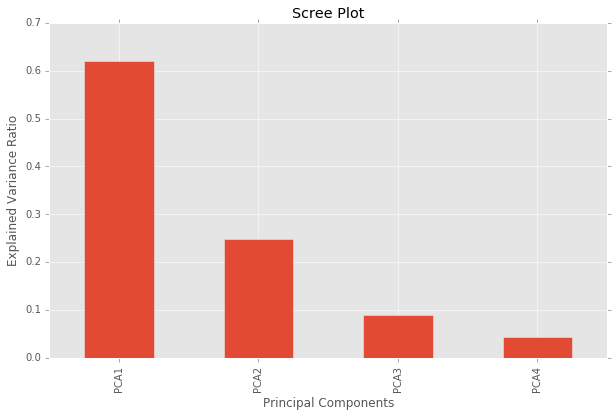

In [362]:
# Plot variance ratio of the four principal components

#scree plot

PCA_variance = list(pca_model.explained_variance_ratio_)
print(PCA_variance)

PCA_variance_series = pd.Series.from_array(PCA_variance)

ax = PCA_variance_series.plot(kind='bar')

ax.set_title("Scree Plot")
ax.set_xlabel("Principal Components")
ax.set_ylabel("Explained Variance Ratio")
x_labels = ['PCA1','PCA2','PCA3','PCA4']
ax.set_xticklabels(x_labels)
plt.show()

**Your interpretation:** 

This barchart seems to indicate that the clusters of states with the greatest amount of variance are in PCA 1 and PCA 2 (which combined share almost 87% of the variance). We show a scatterplot of these two principal components below in 1.3.

### Task 1.3 K-Means Cluster Analysis
1. Using k-means, cluster the states into four clusters. Which states belong to which clusters?
+ Vary k and find the *best* value. How do you determine *best*? 
+ Using the *best* value of k from part (2), use the principal components to plot the clusters. Again label each point using the state name and this time color the states according to cluster.

In [341]:
# Run k-means
X=scaled_data
y=range(len(X))
kmeans_model = KMeans(n_clusters=4, n_init=10)

# fit k-means to data
kmeans_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.34579433480174243

In [342]:
# plot inertia

# I don't know how to plot inertia sorry :/

**Your Interpretation:** 

The homogeneity score has to do with how consistently data points tend to stay within their cluster. Since the homogeneity score is only ~0.346, that indicates that there our data is messy, or that there is a lot of overlap among clusters.

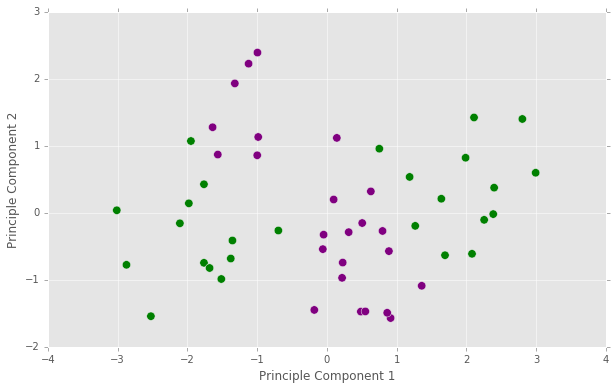

In [343]:
# Plot Principal Components 1 and 2, colored by cluster

cluster_model = AgglomerativeClustering(linkage="average", affinity='euclidean', n_clusters=2)
y_pred = cluster_model.fit_predict(X)
h = homogeneity_score(labels_true = y, labels_pred = y_pred)


from sklearn.metrics import homogeneity_score
from matplotlib.colors import ListedColormap

y_pred = kmeans_model.fit_predict(X)

cmap = ListedColormap(['Purple','Green'])

plt.scatter(PCA_x_coordinates[:, 0], PCA_x_coordinates[:, 1], c=y_pred, cmap=cmap, s=70)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

### Task 1.4 Hierarchical cluster analysis

1.  Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states into four clusters. Which states belong to which clusters? 
+ Make a plot as in Task 1.3. 
+ Compare the results of K-Means to Hierarchical clustering. Are they similar?

In [364]:
# Your cluster code here

state_name = ['state']

cluster_number = []
for num in range(len(y_pred)):
    cluster_number.append(y_pred[num])

#This list shows which states belong to which cluster (but remember to add +1 for this to make sense)   
    
cluster_groups = pd.DataFrame(data=cluster_number,index=index_list)
print(cluster_groups)

                0
Alabama         1
Alaska          3
Arizona         3
Arkansas        1
California      3
Colorado        3
Connecticut     2
Delaware        2
Florida         3
Georgia         1
Hawaii          2
Idaho           0
Illinois        3
Indiana         2
Iowa            0
Kansas          2
Kentucky        0
Louisiana       1
Maine           0
Maryland        3
Massachusetts   2
Michigan        3
Minnesota       0
Mississippi     1
Missouri        3
Montana         0
Nebraska        0
Nevada          3
New Hampshire   0
New Jersey      2
New Mexico      3
New York        3
North Carolina  1
North Dakota    0
Ohio            2
Oklahoma        2
Oregon          2
Pennsylvania    2
Rhode Island    2
South Carolina  1
South Dakota    0
Tennessee       1
Texas           3
Utah            2
Vermont         0
Virginia        2
Washington      2
West Virginia   0
Wisconsin       0
Wyoming         2


0.256261161609


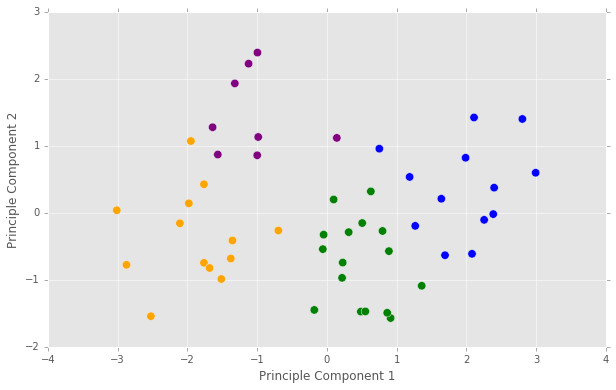

In [366]:
# Plot clusters using PCAs

cluster_model = AgglomerativeClustering(linkage="average", affinity='euclidean', n_clusters=4)
y_pred = cluster_model.fit_predict(X)
hierarchical_clustering = homogeneity_score(labels_true = y, labels_pred = y_pred)

from sklearn.metrics import homogeneity_score
from matplotlib.colors import ListedColormap

y_pred = kmeans_model.fit_predict(X)

cmap = ListedColormap(['Purple','Green','Orange','Blue'])

plt.scatter(PCA_x_coordinates[:, 0], PCA_x_coordinates[:, 1], c=y_pred, cmap=cmap, s=70)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

#plt.zlabel('Principle Component 3')

print(hierarchical_clustering)

**Your Interpretation:** 

The homogeneity score from kmeans (0.34579...) was not similar to what I got with hierarchical clustering (0.25626). Although in theory they should be similar.

## Part 2: Network analysis


### Task 2.1 Load the data and explore

We'll use one of the datasets that is built into networkx, the [Karate Club dataset](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.social.karate_club_graph.html#networkx.generators.social.karate_club_graph).

Load the dataset, print some basic statistics and visualize the nodes, links, and labels with a force directed layout.



In [346]:
# imports and setup 

import networkx as nx

In [347]:
# import karate club, plot info

G=nx.karate_club_graph()
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


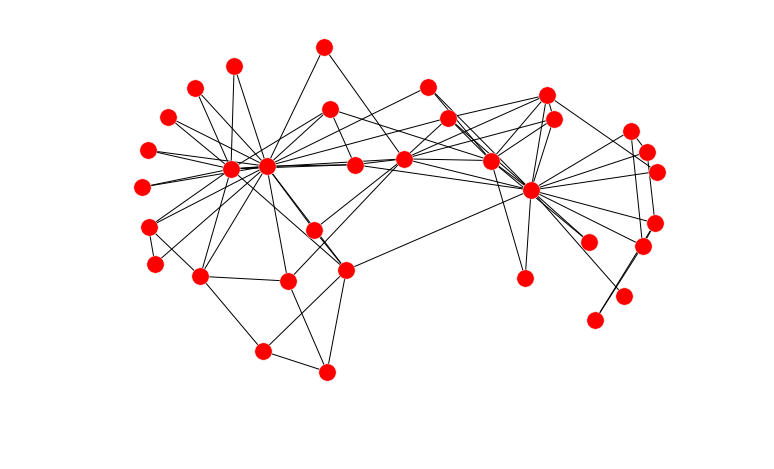

In [348]:
# plot graph

nx.draw_spring(G)
plt.show()

### Task 2.2: Calculate Connectedness Measures

Calculate the node degrees,and betweennes centrality. Plot a node-link diagram with nodes scaled proportionally to these measures for each. Plot histograms of the distributions. 

Which are the most important nodes? 

In [349]:
# calculate and print degrees

degree = nx.degree(G)
degree

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

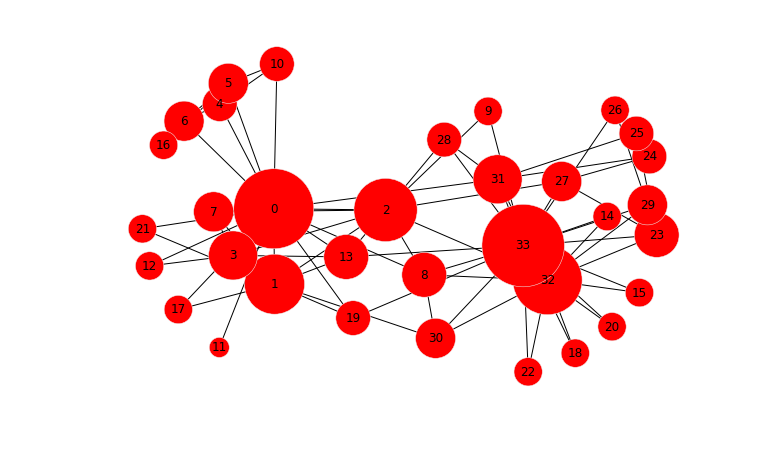

In [350]:
# plot networks scaled by degree

def draw_network(weights):
    pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, node_size=weights)
    nx.draw_networkx_labels(G, pos=pos)
    plt.show()
    
scaled_degree = []
for node in G.nodes():
    scaled_degree.append(degree[node]*400)

draw_network(scaled_degree)

In [351]:
# calculate centrality

centrality = nx.betweenness_centrality(G)
sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[(0, 0.4376352813852815),
 (33, 0.304074975949976),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374)]

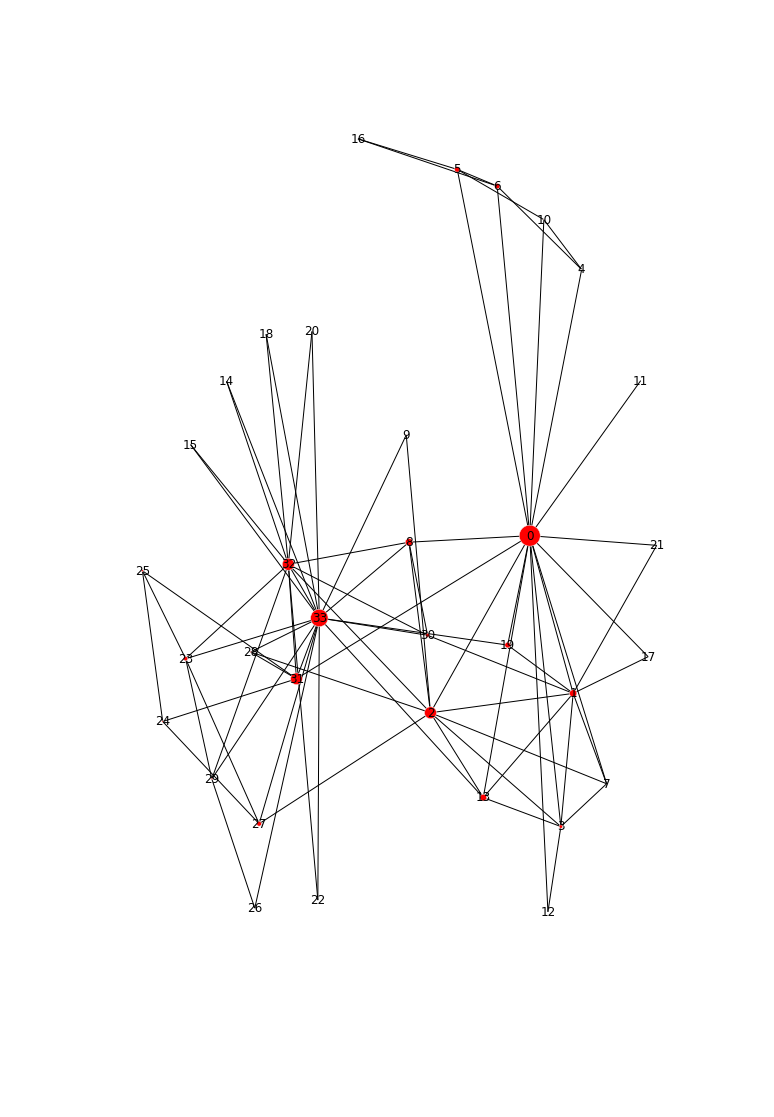

In [352]:
# plot network scaled by centrality

def draw_network_fancy(graph, weights, drawing_factor):
    node_scale = []
    for node in graph.nodes():
        node_scale.append(weights[node]*drawing_factor)
        
    
    plt.rcParams['figure.figsize'] = (10, 15)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos=pos, node_size=node_scale)
    nx.draw_networkx_labels(graph, pos=pos)
    plt.show()


draw_network_fancy(G, centrality, 1000)

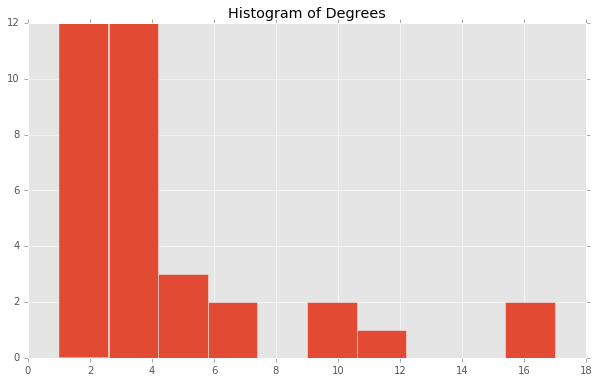

In [353]:
# plot histograms

degrees = list(degree.values())
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(degrees)
plt.title('Histogram of Degrees')
plt.show()

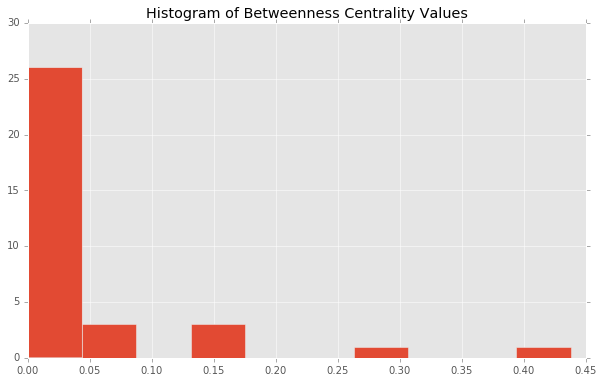

In [354]:
centralities = list(centrality.values())
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(centralities)
plt.title('Histogram of Betweenness Centrality Values')
plt.show()

### Task 2.3: Removed Network Nodes

Remove the two most central nodes from the network. Plot the network. How many connected components remain? How big are these components [read the documentation to learn how to do that]? What does this tell us about this network, is it tightly connected or very centralized?

In [355]:
# remove nodes

G_less_2 = nx.karate_club_graph()
G_less_2.remove_node(0)
G_less_2.remove_node(33)

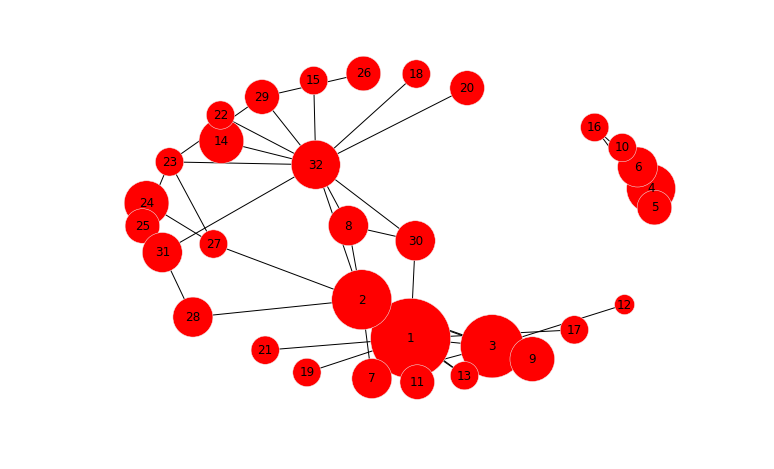

In [356]:
# plot network

def draw_network(weights):
    pos = nx.spring_layout(G_less_2)
    nx.draw(G_less_2, pos=pos, node_size=weights)
    nx.draw_networkx_labels(G_less_2, pos=pos)
    plt.show()
    
scaled_degree = []
for node in G.nodes():
    scaled_degree.append(degree[node]*400)

draw_network(scaled_degree)

In [357]:
# how many components?

nx.number_connected_components(G_less_2)

3

In [372]:
# how big are components?
Compenent1 = 5
Component2 = 1
Component3 = (len(G_less_2) - (Component1 + Component2))

# There's probably a fancier way to do this, but I don't know it...

print(Component1, Component2, Component3)

26 1 5


**Your Interpretation:**

There are 33 nodes in this cluster and removing the two most interconnected nodes broke off two (small) components. To me that suggests that the network is pretty tightly connected. If it were more centralized, one would expect more components to break off.

### Task 2.4: Pathfinding

Print the shortest path from node 18 to 24.

In [359]:
# path finding